<a href="https://www.kaggle.com/code/shedai/sales-volume-seasonality?scriptVersionId=123987170" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-data-set/file_out2.csv
/kaggle/input/retail-data-set/file_out.csv


Loading the data set and showing the firt 5 rows:

In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/retail-data-set/file_out.csv')
df.head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
0,0,716,2019-09-23,1039,381.78,67.37254,1,1.0
1,1,716,2019-09-23,853,593.22,0.00034,1,1.0
2,2,716,2019-09-23,862,423.73,-0.00119,1,1.0
3,3,716,2019-09-23,868,201.70,35.58814,1,1.0
4,4,716,2019-09-23,2313,345.76,61.01966,1,1.0


The first column is useless and removing it:

In [3]:
df.drop(df.columns[0],axis = 1,inplace = True)
df.head()

,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
0,716,2019-09-23,1039,381.78,67.37254,1,1.0
1,716,2019-09-23,853,593.22,0.00034,1,1.0
2,716,2019-09-23,862,423.73,-0.00119,1,1.0
3,716,2019-09-23,868,201.70,35.58814,1,1.0
4,716,2019-09-23,2313,345.76,61.01966,1,1.0


Let's discover the data set very quickly:

In [4]:
df.shape

(33356, 7)

In [5]:
df.dtypes

DocumentID      int64
Date           object
SKU             int64
Price         float64
Discount      float64
Customer        int64
Quantity      float64
dtype: object

In [6]:
df.describe()

,DocumentID,SKU,Price,Discount,Customer,Quantity
count,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000
mean,8227.577227,1241.273174,2915.716875,591.249968,307.968581,5.760695
std,4028.047727,893.872164,10285.512325,3508.983569,162.675166,19.550559
min,0.000000,0.000000,0.000000,-0.004920,0.000000,0.000000
25%,5399.750000,503.000000,661.016949,95.674576,179.000000,2.000000
50%,8733.000000,1008.000000,1203.389830,195.254237,286.000000,4.000000
75%,10857.000000,2078.250000,2572.194915,423.489661,427.000000,4.000000
max,15751.000000,2904.000000,522767.340000,240396.660000,605.000000,1246.000000


Above table only displays the numerical columns. What about the dates of the data? Let's check the starting and ending dates of the data set:

In [7]:
print(df['Date'].min(),' --- ', df['Date'].max())

2019-01-01  ---  2022-11-09


Dates covered are between the first day of 2019 to Nov. 2022.

Now let's focus on the time series analysis with the sales data:


# 2. Data Visualisation for Sales Data
we will use the plotly library to display the sales data as a time series. 

In [8]:
df['UnitPrice'] = df['Price'] / df['Quantity']
df.head()

,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,UnitPrice
0,716,2019-09-23,1039,381.78,67.37254,1,1.0,381.78
1,716,2019-09-23,853,593.22,0.00034,1,1.0,593.22
2,716,2019-09-23,862,423.73,-0.00119,1,1.0,423.73
3,716,2019-09-23,868,201.70,35.58814,1,1.0,201.70
4,716,2019-09-23,2313,345.76,61.01966,1,1.0,345.76


Let's create the time series with the date and the total sales in time:

In [9]:
df['Date'] = pd.to_datetime(df['Date'],format = '%Y-%m-%d')
df_ts = df.groupby('Date').sum()[['Price']]
df_ts.head()

,Price
Date,
2019-01-01,635.593220
2019-01-02,27614.008475
2019-01-03,25399.456609
2019-01-04,23814.415086
2019-01-05,15722.511525


Now, we can visualise the time series:

In [10]:
import plotly.express as px
fig = px.line(df_ts, x=df_ts.index, y="Price", title='Total Sales by Time')
fig.show()

In [11]:
df.sort_values('Price',ascending=False)

,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,UnitPrice
29772,14458,2022-07-27,978,522767.34,240396.660000,418,612.0,854.195000
31595,14974,2022-10-08,2817,508240.00,0.000000,418,1.0,508240.000000
27544,15211,2022-05-07,2086,368644.07,0.000000,433,60.0,6144.067833
31261,14998,2022-10-11,2817,334161.00,0.000000,418,1.0,334161.000000
15308,0,2020-11-17,541,332574.46,-0.003959,506,2.0,166287.230000
...,...,...,...,...,...,...,...,...
25290,733,2021-04-05,750,0.00,0.000000,455,0.0,NaN
9584,107,2019-03-25,2889,0.00,40.000000,396,2.0,0.000000
25291,733,2021-04-05,770,0.00,0.000000,455,0.0,NaN
14575,713,2020-07-06,1334,0.00,0.000000,434,0.0,NaN


**Cleaning out outliers**
Some of the customers have huge amount of orders and should be handled with another model. For the simplicity the outliers (top 5 customers) are getting removed. 

In [12]:
df.sort_values('Price',ascending=False)

,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,UnitPrice
29772,14458,2022-07-27,978,522767.34,240396.660000,418,612.0,854.195000
31595,14974,2022-10-08,2817,508240.00,0.000000,418,1.0,508240.000000
27544,15211,2022-05-07,2086,368644.07,0.000000,433,60.0,6144.067833
31261,14998,2022-10-11,2817,334161.00,0.000000,418,1.0,334161.000000
15308,0,2020-11-17,541,332574.46,-0.003959,506,2.0,166287.230000
...,...,...,...,...,...,...,...,...
25290,733,2021-04-05,750,0.00,0.000000,455,0.0,NaN
9584,107,2019-03-25,2889,0.00,40.000000,396,2.0,0.000000
25291,733,2021-04-05,770,0.00,0.000000,455,0.0,NaN
14575,713,2020-07-06,1334,0.00,0.000000,434,0.0,NaN


Creating the time series one more time:

In [13]:
df['Date'] = pd.to_datetime(df['Date'],format = '%Y-%m-%d')
df_ts = df.groupby('Date').sum()[['Price']]
df_ts.head()

,Price
Date,
2019-01-01,635.593220
2019-01-02,27614.008475
2019-01-03,25399.456609
2019-01-04,23814.415086
2019-01-05,15722.511525


In [14]:
import plotly.express as px
fig = px.line(df_ts, x=df_ts.index, y="Price", title='Total Sales by Time')
fig.show()

# 2. Time Series Decomposition
Statsmodels library is very useful for the seasonal time series decomposition. The decomposition outputs 3 major time series features: 
- Trend : The trendline by time
- Seasonality: depending on the frequency of the time series, the seasonality test
- Residue : the value left, after the trend and seasonality are subtracted from the original data. 

Seasonality might be useful to understand the patterns in the time series data, while trend is useful to monitor the direction of signal. finally residue is handy for the anomaly detection. All the above signals can also be visualised by the below code:

In [15]:
df_ts = df_ts.asfreq('7D')
df_ts.describe()

,Price
count,1.960000e+02
mean,8.015821e+04
std,1.231161e+05
min,4.642000e+02
25%,2.818817e+04
50%,4.079807e+04
75%,7.626883e+04
max,1.094623e+06


First we convert the dataframe df_ts to a real time series data frame by setting a time frequency. The frequency can be daily, monthly or even hourly etc. We will use '7D' for 7 days (a week). 

Finally we will set the missing values to 0, because the seasonal_decompose library from statsmodels does not accept any missing value. We can assume there is no sales if the corresponding week is null. 

In [16]:
df_ts.isnull().sum()
df_ts = df_ts.fillna(0)

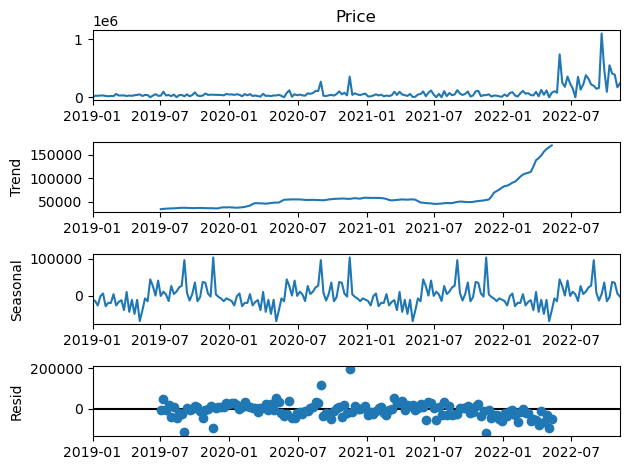

In [17]:
# Import packages
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Plot the decomposition for multiplicative series
decomposition_plot_multi = seasonal_decompose(df_ts['Price'],
                                              model='additive')
decomposition_plot_multi.plot()
plt.show()

for a better view of above decomposition, we can redraw the seasonality in plotly:

In [18]:
df_season = decomposition_plot_multi.seasonal.to_frame()
df_season.head()

,seasonal
Date,
2019-01-01,-11438.922895
2019-01-08,-14934.481125
2019-01-15,-27093.030208
2019-01-22,-1808.900372
2019-01-29,5594.587102


In [19]:
fig = px.line(df_season, x=df_season.index, y='seasonal', title='Seasonality of Total Sales by 7Days')
fig.show()

Since we can detect a seasonality in the dataset, we can try some rolling statistics:

In [20]:
df_season['MA'] = df_season['seasonal'].rolling(3).mean()
df_season.fillna(0, inplace = True)
df_season.head()

,seasonal,MA
Date,,
2019-01-01,-11438.922895,0.000000
2019-01-08,-14934.481125,0.000000
2019-01-15,-27093.030208,-17822.144742
2019-01-22,-1808.900372,-14612.137235
2019-01-29,5594.587102,-7769.114492


In [21]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_season.index, y=df_season['seasonal'],
                    mode='lines',
                    name='Seasonal Sales'))
fig.add_trace(go.Scatter(x=df_season.index, y=df_season['MA'],
                    mode='lines+markers',
                    name='Moving Average'))


fig.show()